#import package

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Flatten, Dense, MaxPool2D, Conv2D, InputLayer, Dropout, ZeroPadding2D

MY_EPOCH = 400
MY_BATCH = 256

#dataset processing

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

def data_shape():
  print('학습용 입력 데이터 모양 : ' , X_train.shape)
  print('학습용 출력 데이터 모양 : ' , Y_train.shape)
  print('평가용 입력 데이터 모양 : ' , X_test.shape)  
  print('평가용 출력 데이터 모양 : ' , Y_test.shape)

data_shape()

학습용 입력 데이터 모양 :  (60000, 28, 28)
학습용 출력 데이터 모양 :  (60000,)
평가용 입력 데이터 모양 :  (10000, 28, 28)
평가용 출력 데이터 모양 :  (10000,)


학습용 데이터 첫번째 화소 정보 :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

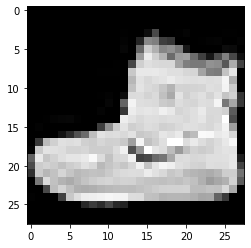

In [3]:
print('학습용 데이터 첫번째 화소 정보 : ', X_train[0])
print('학습용 데이터 첫번째 라벨 정보 : ', Y_train[0])

plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print('학습용 데이터 첫번째 라벨 정보 : ', Y_train[0])
data_shape()

학습용 데이터 첫번째 라벨 정보 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터 모양 :  (60000, 28, 28, 1)
학습용 출력 데이터 모양 :  (60000, 10)
평가용 입력 데이터 모양 :  (10000, 28, 28, 1)
평가용 출력 데이터 모양 :  (10000, 10)


#CNN MODEL

In [5]:
model = Sequential()
model.add(InputLayer(input_shape= (28, 28, 1)))
model.add(ZeroPadding2D(padding=3))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['acc'])
print('train start')
begin = time()
model.fit(X_train, Y_train, epochs = MY_EPOCH, batch_size= MY_BATCH, verbose = 1)
end = time()
print("train time : ", end-begin)

train start
Epoch 1/400
235/235 [==============================] - 9s 27ms/step - loss: 0.7775 - acc: 0.7248
Epoch 2/400
235/235 [==============================] - 6s 27ms/step - loss: 0.2720 - acc: 0.9031
Epoch 3/400
235/235 [==============================] - 6s 27ms/step - loss: 0.2062 - acc: 0.9237
Epoch 4/400
235/235 [==============================] - 6s 27ms/step - loss: 0.1757 - acc: 0.9352
Epoch 5/400
235/235 [==============================] - 6s 27ms/step - loss: 0.1476 - acc: 0.9460
Epoch 6/400
235/235 [==============================] - 6s 27ms/step - loss: 0.1190 - acc: 0.9564
Epoch 7/400
235/235 [==============================] - 6s 27ms/step - loss: 0.0994 - acc: 0.9631
Epoch 8/400
235/235 [==============================] - 6s 27ms/step - loss: 0.0776 - acc: 0.9714
Epoch 9/400
235/235 [==============================] - 6s 27ms/step - loss: 0.0613 - acc: 0.9778
Epoch 10/400
235/235 [==============================] - 6s 27ms/step - loss: 0.0448 - acc: 0.9840
Epoch 11/400
235/

#CNN evaluate

In [7]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('loss : {:.2f}'.format(score[0]))
print('acc : {:.2f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.6031 - acc: 0.9324
loss : 1.60
acc : 0.93


In [8]:
print(X_test[0].shape)
#batch정보 추가
#기계학습에서 batch의 역할 매번 학습용 데이터를 몇개를 가져와서 계산하는가.
image = X_test[0].reshape(1,28,28,1)
pred = model.predict(image)
print("평가용 첫번째 이미지와 라벨", Y_test)
print("CNN 예측값(10개)", pred)
print("CNN 에측 라벨 : ", np.argmax(pred, axis=1))
print("정답 : ", Y_test[0])

(28, 28, 1)
평가용 첫번째 이미지와 라벨 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CNN 예측값(10개) [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
CNN 에측 라벨 :  [9]
정답 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
